# Initial Exploration of Conflict Data from GDELT Project

Dataset extracted from GDELT Project Database via BigQuery by Github user Vlad-ds:

https://github.com/vlad-ds/gdelt-conflict

The GDELT Project, in their own words, is "a realtime network diagram and database of global human society for open research".

https://www.gdeltproject.org/

GDELT uses media reporting to create a detailed record of human events over time. In recording these events, GDELT uses a coding ontology known as CAMEO (Conflict and Mediation Event Observations), recording events as 'carried out by Actor 1', 'on the target, Actor 2'.  

The dataset explored here contains events in four macro-categories chosen to provide a broad view of conflict: 'coerce', 'fight', 'attack', and 'use unconventional mass violence'. While this dataset does not contain both 'source' and 'target' information, it does provide 'source' information for a unidimensional view of activities carried out by actors within a given country. The data is aggregated by year, country and unique event type and includes normalization.

The GDELT Project provides an enormous wealth of information and analysis possibilities. This exploration will proceed my own queries of the GDELT database in hopes of diving deeper into a number of interesting topics!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
events = pd.read_csv('gdelt_conflict_1_0.csv')

In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176432 entries, 0 to 176431
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  176432 non-null  int64  
 1   CountryCode           176432 non-null  object 
 2   CountryName           176432 non-null  object 
 3   SumEvents             176432 non-null  int64  
 4   TotalEvents           176432 non-null  int64  
 5   NormalizedEvents1000  176432 non-null  float64
 6   EventRootCode         176432 non-null  int64  
 7   EventRootDescr        176432 non-null  object 
 8   EventCode             176432 non-null  int64  
 9   EventDescr            176432 non-null  object 
 10  GoldsteinScale        176432 non-null  float64
 11  AvgNumMentions        176432 non-null  float64
 12  SumNumMentions        176432 non-null  int64  
 13  AvgAvgTone            176432 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 18.

In [4]:
events.head(50)

,Year,CountryCode,CountryName,SumEvents,TotalEvents,NormalizedEvents1000,EventRootCode,EventRootDescr,EventCode,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
0,1979,CH,China,350,33541,10.434990,19,FIGHT,193,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000
1,1979,HR,Croatia,14,714,19.607843,19,FIGHT,190,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594
2,1979,SU,Sudan,16,1354,11.816839,17,COERCE,173,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047
3,1979,SY,Syria,71,3119,22.763706,19,FIGHT,193,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653
4,1979,GM,Germany,33,6615,4.988662,17,COERCE,172,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399
5,1979,UK,United Kingdom,67,15721,4.261815,18,ASSAULT,180,"Use unconventional violence, not specified below",-9.0,4.313433,289,4.057995
6,1979,UK,United Kingdom,7,15721,0.445264,17,COERCE,1711,Confiscate property,-9.2,3.857143,27,3.936435
7,1979,IS,Israel,6,17311,0.346600,19,FIGHT,191,"Impose blockade, restrict movement",-9.5,5.666667,34,3.751923
8,1979,AO,Angola,21,1530,13.725490,19,FIGHT,192,Occupy territory,-9.5,5.523810,116,2.859268
9,1979,RS,Russia,8,27338,0.292633,17,COERCE,1711,Confiscate property,-9.2,3.375000,27,4.230203


## Observing conventional military events; Iran, Iraq, Syria, and Afghanistan, 1979 - 2021

### Iran

In [5]:
iran_fight = events.query('CountryName == "Iran" and EventRootDescr == "FIGHT"')

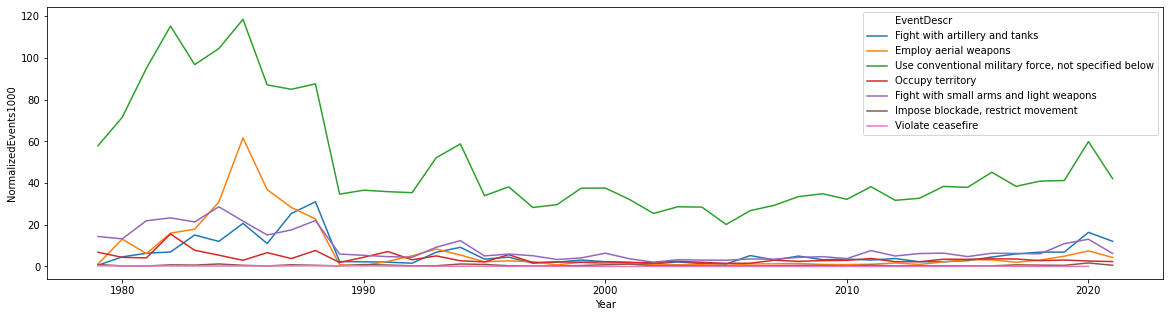

In [6]:
plt.figure(figsize = (20,5))
sb.lineplot(data = iran_fight, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventDescr');

We see an expected peak in activity between 1980 and 1988, the period of the Iran-Iraq war. Iran's involvment in the Syrian civil war is evidenced by the continuing upward trend through the beginning of that conflict.

### Iraq

In [7]:
iraq_fight = events.query('CountryName == "Iraq" and EventRootDescr == "FIGHT"')

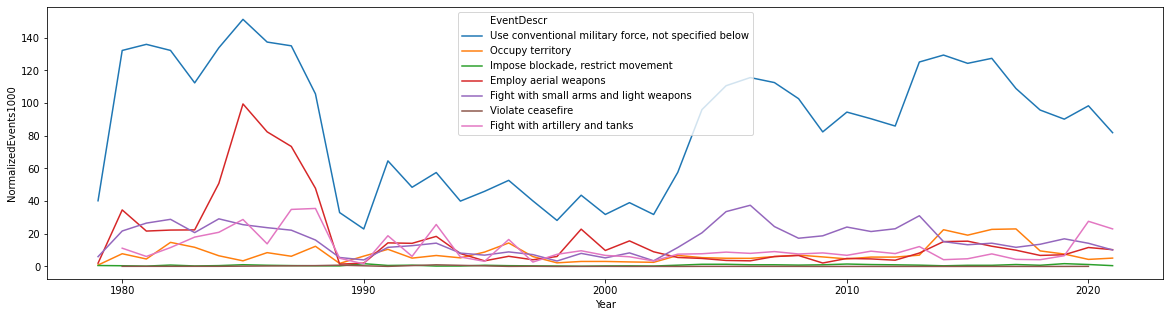

In [8]:
plt.figure(figsize = (20,5))
sb.lineplot(data = iraq_fight, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventDescr');

We see activity related to the Iran-Iraq war 1980-1988, the very breif Gulf War of 1991, and the activity surges again with the beginning of the US-Iraq war in 2003. The use of aerial weapons was much less prominent after the US invasion surely due to US air dominance. Conventional military events continue with Iraq's war against ISIS and other non-state actors.

### Syria

In [9]:
syria_fight = events.query('CountryName == "Syria" and EventRootDescr == "FIGHT"')

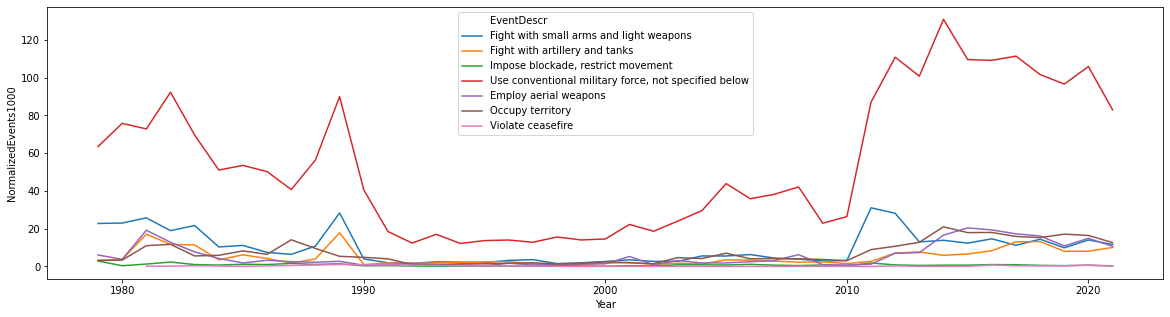

In [10]:
plt.figure(figsize = (20,5))
sb.lineplot(data = syria_fight, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventDescr');

We see Syrian involvement in the Iran-Iraq war in their alliance with Iran, and military activity surges with the start of the Syrian civil war.

### Afghanistan

In [11]:
afghan_fight = events.query('CountryName == "Afghanistan" and EventRootDescr == "FIGHT"')

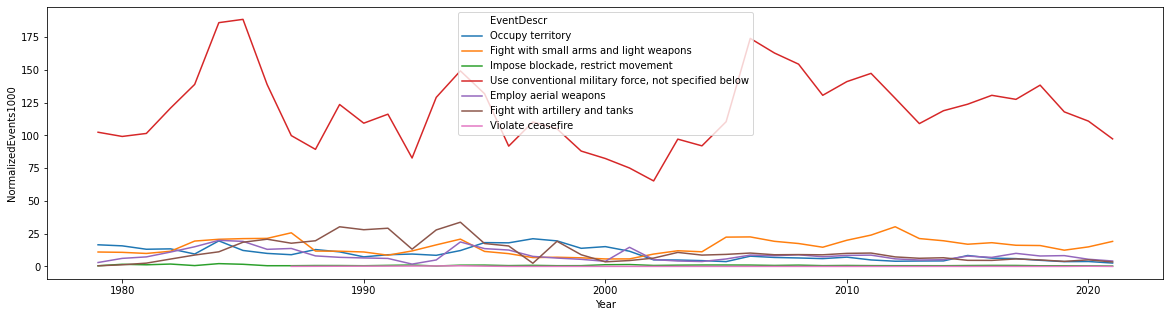

In [12]:
plt.figure(figsize = (20,5))
sb.lineplot(data = afghan_fight, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventDescr');

War in Afghanistan appears perpetual, with much activity during the Russian occupation with renewed activity with the start of the US war in 2001.

### Observing the height of the Iraqi Insurgency, leading into the Civil War; 2003-2006

In [18]:
iraq_root = events.query('CountryName == "Iraq"').groupby(['Year','EventRootDescr'])['NormalizedEvents1000'].sum()

In [20]:
iraq_root = pd.DataFrame(iraq_root).reset_index()

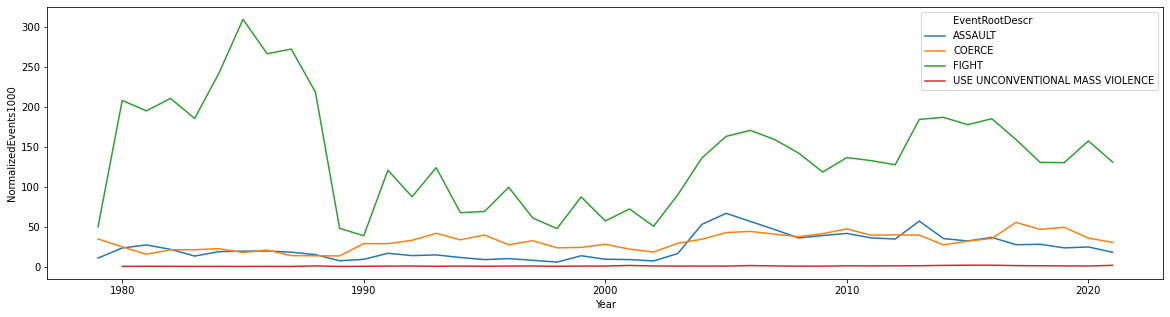

In [24]:
plt.figure(figsize = (20,5))
sb.lineplot(data=iraq_root, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventRootDescr');

Events in the 'assault' category are attacks typically carried out by non-state actors; assassinations, kidnappings, car bombings, etc. You can see these events start to spike in correlation with the Iraqi insurgency and the civil war that followed shortly after; 2003-2006.

In [40]:
assault_codes = ['181','1823','1831','1832','1833','185','186']
events['iraq_assault'] = events['EventCode'].isin(assault_codes)
iraq_assault = events.query('CountryName == "Iraq" and iraq_assault == True')

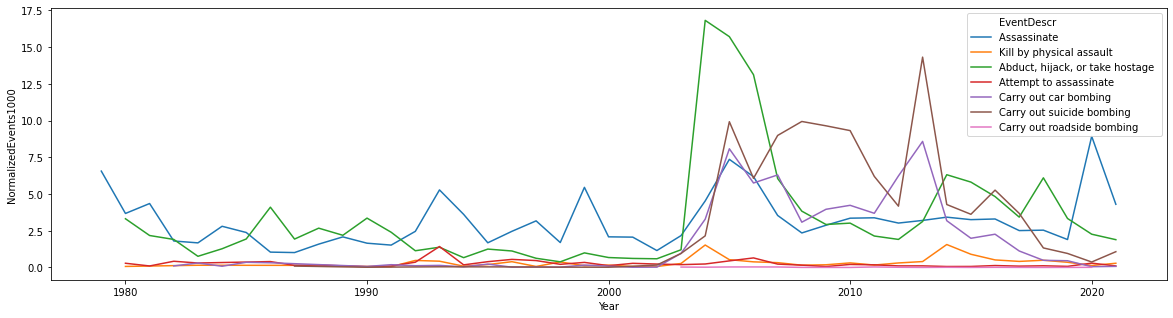

In [42]:
plt.figure(figsize = (20,5))
sb.lineplot(data=iraq_assault, x = 'Year', y = 'NormalizedEvents1000', hue = 'EventDescr');

Looking at some specific 'assault' events, we see a dramatic increase in almost all events at the beginning of the insurgency, with abdutions being the most common event. Abduction events rose so swiftly - does this imply use of abductions by an organized group? 